## In-class practice for Lecture 19

* 2-D grid meshing using meshgrid( )
* 2-D contour plots using contour( )
* 2-D color plots using pcolor( ), contourf( )
* Simple modeling uisng NumPy and Matplotlib
* Answer each question using Python codes in a separate cell. send it to binzh@hku.hk right after class (whether you've got it done or not)

### 1.  Dipole field on Earth's surface

on the earth's surface, the magnitude of ideal dipole field goes like the following equation,

$$B(\lambda) = B_E\sqrt{1+3\sin^2\lambda}$$

where $B_E = 31000$ nT and $\lambda$ is the latitude (ignore dipole tilt here). Now let's use the dipole magnetic field equation to make some plots (Geophysics lab!)

- generate a 1-D NumPy array named _lon_, between -180 and 180 degrees, step by 5 degrees
- generate a 1-D NumPy array named _lat_, between -90 and 90 degrees, step by 5 degrees
- use the _lon_, and _lat_ arrays to generate a 2-D mesh using the X,Y = meshgrid(_lon_, _lat_) function. After calling the meshgrid() function, X is a 2-D NumPy array of longitude (or the longitude of each grid point), Y is a 2-D NumPy array of latitude ($\lambda$)
- calculate the magnitude of the dipole geomagnetic field as a function of X and Y
- use pcolor( ) to plot the magnitude of dipole B field as a function of the 2-D grid (X,Y)
- use contour( ) to plot 30 contours of B magnitude as on the 2-D grid (X,Y)
- use contourf( ) to plot the magnitude of dipole B field on the 2-D grid (X,Y), try to specify the **levels** option in contourf.
- in a **new figure**, generate a map using the Basemap module with only **drawcoastlines()** used, using the "ortho" projection
- now map the 2-D (X,Y) grid to the map coordinates using you Basemap object, and them visualize the intensity of the dipole magnetic field on top of your map using the contourf( ) function.
- play with the colormap and choose your favorite one


### 2. IGRF field analysis Inclination of the geomagnetic field

In 1600, William Gilbert hypothesized that the Earth itself was a giant bar magnetic and that this gave rise to the Earth's **magnetic field**!  If it were true- that the source of the magnetic field behaved like a giant bar magnet- then the **inclination** of the **magnetic field** would vary as a function of latitude. 

**Inclination** is the angle between the horizontal and the direction of the field. If the field were generated by a bar magnet, then the **inclination** would be horizontal (0 $^\circ$) at the magnetic equator and vertical ($\pm 90 ^\circ$) at the North and South poles. The equation that relates **inclination** ($I$) and latitude ($\lambda$) is:

$$ \tan I = 2 \tan \lambda \quad \quad(dipole\  equation)$$        

- Calculate the inclination at every latitude using the dipole equation:

    -  write a function (regular or lambda function) that calculates inclination $I$ (use the dipole equation) as a function of $\lambda$ [**Hint:** Remember that **np.tan( )**  and **np.arctan( )** work in radians and your plot should be in degrees.]   

    -  use the 2-D grid (X,Y) you've generated in Prob. 1, apply the function you wrote to the (X, Y) grid and compute the inclination for all the grid points
    - use the "hammer" projection to generate a global map 
    - make a 2-D color plot of the idealized dipole inclination $I$ on top of your map projection
    - add a colorbar to your figure
    
    
- Use the function **magMap( )** to evaluate the actual inclination angle (that is the "Is" array in the lecture notes) of IGRF for the year you were born

    - download the **mkigrf** module from moodle and import into Python

    - Use **meshgrid( )** to make a 2-D array of the latitudes and longitudes that were returned from **magMap( )** (the function is given in the code cell)

    - use the "hammer" projection to generate a global map 

    - use contourf() to make a color plot of the actual inclination on top of your "hammer" map
    
    - use the contour() function to show the contour with zero inclination ($I = 0$), which is the geomagnetic equator

    - which colormap of the following would you choose for your inclination map?
        - viridis
        - jet
        - bwr
        - plasma 

In [1]:
import mkigrf

def magMap(date,**kwargs):
    """
    generates the data for a map of the magnetic field. 
    Inputs: 
    required: 
        date = decimal year for evaluation (between 1900 and 2020)
    optional: 
        lon_0 = desired zero longitude
    
    Returns: 
    
    Bdec = declinations
    Binc = inclinations
    B = field strength (in microtesla)
    lons = array of longitudes
    lats = array of latitudes

    """
    if 'lon_0' in kwargs.keys(): # check if there are keyword arguments
        lon_0=kwargs['lon_0'] # if lon_0 is set, use that one
    else: # otherwise..... 
        lon_0=0. # set the default lon_0 to 0. 
    
    incr=10 # we can vary to the resolution of the model
    lonmax=(lon_0+180.)%360+incr # get some parameters for our arrays of lat/lon
    lonmin=(lon_0-180.)
    latmax=90+incr
    lons=np.arange(lonmin,lonmax,incr) # make a 1D array of longitudes (like elons)
    lats=np.arange(-90,latmax,incr)# make a 1D array of longitudes (like elats)
    
    
    # set up some containers for the field elements
    lenLats, lenLons = len(lats), len(lons)
    B=np.zeros((lenLats,lenLons))
    Binc=np.zeros((lenLats,lenLons))
    Bdec=np.zeros((lenLats,lenLons))
    Brad=np.zeros((lenLats,lenLons))
    
    for j in range(lenLats): # step through the latitudes
        for i in range(lenLons): # and the longitudes
            x,y,z,f=mkigrf.doigrf(lons[i],lats[j],date)  # get the field elements
            Dec,Inc,Int=mkigrf.cart2dir(x,y,z) # turn them into polar coordites
            B[j][i]=Int*1e-3 # convert the string to microtesla (from nT)
            Binc[j][i]=Inc # store the inclination value
            Bdec[j][i]=Dec # store the declination value
    return Bdec,Binc,B,lons,lats # return the arrays.  

# start your code here


Potential Surfaces

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def pot(x,y,x0,y0):
    r = np.sqrt((x-x0)**2 + (y-y0)**2)
    return -1/r

x = np.linspace(-1,1,100)
y = x
xx,yy=np.meshgrid(x,y)

grav = 2*pot(xx,yy,0.333,0.404) - 3*pot(xx,yy,0.533,0.704)- 1*pot(xx,yy,-0.4533,0.2704)

plt.contour(xx,yy,grav)


(-3.0, 3.0, -2.0, 2.0)

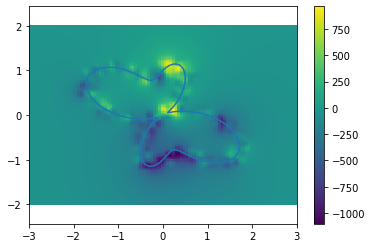

In [68]:
# r=1−cosθsin3θ
import random

def pot(x,y,x0,y0,M):
    r = np.sqrt((x-x0)**2 + (y-y0)**2)
    r = np.fmax(r,0.05)
    return -1/r*M

theta = np.linspace(0,np.pi*2,1000)
r = 1 - np.cos(theta)*np.sin(3*theta)

x = r*np.cos(theta)
y = r*np.sin(theta)
z = x*0

plt.plot(x,y,'-')

n = x.size

x1 = np.linspace(-3,3,100)
y1 = np.linspace(-2,2,150)
xx,yy=np.meshgrid(x1,y1)

grav = xx*0

for i in range(x.size):
    x[i] = x[i] + (random.random()-0.5)*0.4
    y[i] = y[i] + (random.random()-0.5)*0.2
    #z[i] = 20*(random.lognormvariate(2, 0.8)-0.5)
    z[i] = 10*random.gauss(0, 0.6)
    grav = grav+pot(xx,yy,x[i],y[i],z[i])
    

plt.pcolor(xx,yy,grav)
plt.colorbar()
plt.axis('equal')
#plt.scatter(x,y,s=z,alpha=0.5)


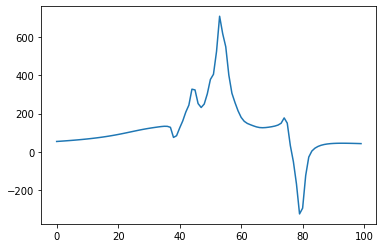

In [149]:
plt.plot(grav[50,:])

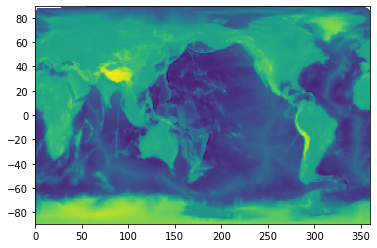

In [69]:
import pandas as pd
from scipy.interpolate import griddata

fn = '../Datasets/nt01deg.ast'

df = pd.read_csv(fn)

data = np.loadtxt(fn)

lat = data[:,0]
lon = data[:,1]
ele = data[:,2]

grid_x, grid_y = np.meshgrid(np.linspace(-89.5,89.5,360), np.linspace(0,360,720))
grid_z = griddata((lat,lon), ele, (grid_x, grid_y),method='linear')
plt.pcolor(grid_y,grid_x,grid_z)

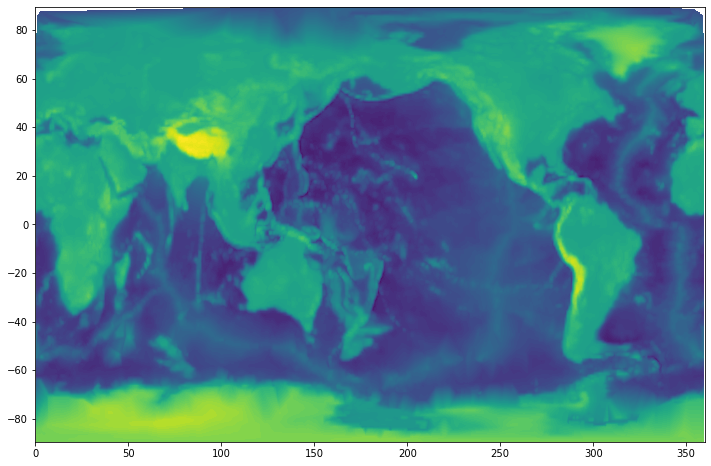

In [74]:
plt.figure(figsize=(12,8))
plt.contourf(grid_y,grid_x,grid_z,levels=100)